In [5]:
import os
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

import analyze_functions

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 150)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


filepath = "/Users/Adrien/Documents/paramoteur/syride/analyze_traces/syride_traces/AdrienM/traces/1914899/1914899.json"

with open(filepath, "r") as file:
    data = json.load(file)

data

common_filename = "/Users/Adrien/Documents/paramoteur/syride/analyze_traces/syride_traces"

directory_amo = f'{common_filename}/AdrienM/'
directory_arp = f'{common_filename}/air race pro/'
directory_j2f = f'{common_filename}/j2f/'
directory_thomas = f'{common_filename}/Thomas16/'
directory_nico = f'{common_filename}/Nico16/'

df_amo_raw = analyze_functions.create_dataframe_from_json(directory_amo)
df_arp_raw = analyze_functions.create_dataframe_from_json(directory_arp)
df_j2f_raw = analyze_functions.create_dataframe_from_json(directory_j2f)
df_thomas_raw = analyze_functions.create_dataframe_from_json(directory_thomas)
df_nico_raw = analyze_functions.create_dataframe_from_json(directory_nico)

In [6]:
dict_filenames = {
    "amo":"AdrienM",
    "arp":"air race pro",
    "j2f":"j2f",
    "thomas":"Thomas16",
    "nico":"Nico16",
    "jerome":"Jerome A",
    "augry":"AUGRY",
    "souille":"Souille",
    "tof_torsac":"Tof Torsac",   
    "Philippe":"Au_Phil_du_vent",
    "fabrice":"fabrice_f",
    "remy":"Rémydu24",
    "julien":"Julien16",
    "florent":"Florent_Essar",
}

df_names_raw = []
common_filename = "/Users/Adrien/Documents/paramoteur/syride/analyze_traces/syride_traces"

for name, foldername in dict_filenames.items():
    full_filename = f"{common_filename}/{foldername}/"
    df = analyze_functions.create_dataframe_from_json(full_filename)
    globals()[f"df_{name}_raw"] = df.copy()
    df_names_raw.append(f"df_{name}_raw")

print(df_names_raw)

['df_amo_raw', 'df_arp_raw', 'df_j2f_raw', 'df_thomas_raw', 'df_nico_raw', 'df_jerome_raw', 'df_augry_raw', 'df_souille_raw', 'df_tof_torsac_raw', 'df_Philippe_raw', 'df_fabrice_raw', 'df_remy_raw', 'df_julien_raw', 'df_florent_raw']


int_features = [
    "num_activite",
    "distance",
    "distance_activite",
    "distance_cumulee",
    "vitesse_max",
    "plafond",
    "gain",
]

df1 = df_amo_raw[df_amo_raw["gain"].apply(lambda x: isinstance(x, list))]
df1[int_features]

In [7]:
df_names = []
list_dfs = []
for df_name in df_names_raw:
    print(df_name)
    name_df = str(df_name[:-4])
    globals()[f"{name_df}"] = (
        globals()[f"{df_name}"]
        .pipe(analyze_functions.start_pipeline)
        .pipe(analyze_functions.assign_data_types)
        .pipe(analyze_functions.flight_type)
        .pipe(analyze_functions.transform_dates)
        .pipe(analyze_functions.get_season)
    )

    globals()[f"{name_df}_paramot"] = globals()[f"{name_df}"][globals()[f"{name_df}"]["type_vol"]=="paramoteur"]

    df_names.append(f"{name_df}")
    list_dfs.append(globals()[f"{name_df}"])
    print()

df_amo_raw
start_pipeline took 0:00:00.000149, shape=(76, 22)
assign_data_types took 0:00:00.038877, shape=(76, 22)
flight_type took 0:00:00.002260, shape=(76, 24)
transform_dates took 0:00:00.003804, shape=(76, 27)
get_season took 0:00:00.004986, shape=(76, 28)

df_arp_raw
start_pipeline took 0:00:00.000255, shape=(672, 22)
assign_data_types took 0:00:00.020631, shape=(672, 22)
flight_type took 0:00:00.001678, shape=(672, 24)
transform_dates took 0:00:00.001897, shape=(672, 27)
get_season took 0:00:00.002101, shape=(672, 28)

df_j2f_raw
start_pipeline took 0:00:00.000163, shape=(363, 22)
assign_data_types took 0:00:00.017298, shape=(363, 22)
flight_type took 0:00:00.001687, shape=(363, 24)
transform_dates took 0:00:00.002573, shape=(363, 27)
get_season took 0:00:00.002088, shape=(363, 28)

df_thomas_raw
start_pipeline took 0:00:00.000143, shape=(246, 22)
assign_data_types took 0:00:00.013871, shape=(246, 22)
flight_type took 0:00:00.001331, shape=(246, 24)
transform_dates took 0:00:00

df_amo = (
    df_amo_raw
    .pipe(analyze_functions.start_pipeline)
    .pipe(analyze_functions.assign_data_types)
    .pipe(analyze_functions.flight_type)
    .pipe(analyze_functions.transform_dates)
    .pipe(analyze_functions.get_season)
)

df_arp = (
    df_arp_raw
    .pipe(analyze_functions.start_pipeline)
    .pipe(analyze_functions.assign_data_types)
    .pipe(analyze_functions.flight_type)
    .pipe(analyze_functions.transform_dates)
    .pipe(analyze_functions.get_season)
)

df_j2f = (
    df_j2f_raw
    .pipe(analyze_functions.start_pipeline)
    .pipe(analyze_functions.assign_data_types)
    .pipe(analyze_functions.flight_type)
    .pipe(analyze_functions.transform_dates)
    .pipe(analyze_functions.get_season)
)

df_thomas = (
    df_thomas_raw
    .pipe(analyze_functions.start_pipeline)
    .pipe(analyze_functions.assign_data_types)
    .pipe(analyze_functions.flight_type)
    .pipe(analyze_functions.transform_dates)
    .pipe(analyze_functions.get_season)
)

df_nico = (
    df_nico_raw
    .pipe(analyze_functions.start_pipeline)
    .pipe(analyze_functions.assign_data_types)
    .pipe(analyze_functions.flight_type)
    .pipe(analyze_functions.transform_dates)
    .pipe(analyze_functions.get_season)
)

df_amo_paramot = df_amo[df_amo["type_vol"]=="paramoteur"]
df_arp_paramot = df_arp[df_arp["type_vol"]=="paramoteur"]
df_j2f_paramot = df_j2f[df_j2f["type_vol"]=="paramoteur"]
df_thomas_paramot = df_thomas[df_thomas["type_vol"]=="paramoteur"]
df_nico_paramot = df_nico[df_nico["type_vol"]=="paramoteur"]

In [8]:
#df_list = [df_amo, df_arp, df_j2f, df_thomas, df_nico,]
df_tot = pd.concat(list_dfs)
df_tot_paramot = df_tot[df_tot["type_vol"]=="paramoteur"]
df_tot_parapente = df_tot[df_tot["type_vol"]=="parapente"]

display(df_tot.head(), df_tot.shape, df_tot["pilote"].value_counts().to_frame())

,pilote,num_activite,types,site,date,heure,flight_time,voile,distance,instrument,date_activite,site_activite,distance_activite,distance_cumulee,vitesse_max,vitesse_moyenne,plafond,gain,duree_vol,vario_max,g_max,adresse_zip,duree_vol_minutes,type_vol,annee,mois,jour_semaine,saison
0,AdrienM,1979467,Vol moteur,Site Secondigne Sur Belle 01,2023-02-16,12:49:00,0 days 00:26:14,Daytona,11,Evolution,2023-02-16,Site Secondigne Sur Belle 01,11,16,70,25.2,479,419,0 days 00:26:14,3.4,1.5,https://www.syride.com/scripts/downloadZIP.php...,26.233333,paramoteur,2023,2,Thursday,hiver
1,AdrienM,2079412,Vol moteur,Fayard,2023-05-13,09:19:00,0 days 00:52:36,Daytona,27,Evolution,2023-05-13,Fayard,27,34,61,30.8,751,615,0 days 00:52:36,2.9,1.6,https://www.syride.com/scripts/downloadZIP.php...,52.600000,paramoteur,2023,5,Saturday,printemps
2,AdrienM,2035366,Vol moteur,Magnac Lavalette Treuil,2023-04-09,19:13:00,0 days 00:49:02,Flex-one,28,Evolution,2023-04-09,Magnac Lavalette Treuil,28,33,62,34.3,792,667,0 days 00:49:02,2.8,1.5,https://www.syride.com/scripts/downloadZIP.php...,49.033333,paramoteur,2023,4,Sunday,printemps
3,AdrienM,2228584,Vol site,Cabariot,2023-08-14,20:56:00,0 days 00:29:53,Daytona,15,Evolution,2023-08-14,Cabariot,15,18,71,30.1,358,354,0 days 00:29:53,2.6,1.4,https://www.syride.com/scripts/downloadZIP.php...,29.883333,parapente,2023,8,Monday,été
4,AdrienM,2190658,Vol moteur,Site Secondigne Sur Belle 01,2023-07-22,09:08:00,0 days 00:39:38,Daytona,22,Evolution,2023-07-22,Site Secondigne Sur Belle 01,22,24,67,33.3,542,497,0 days 00:39:38,3.1,1.2,https://www.syride.com/scripts/downloadZIP.php...,39.633333,paramoteur,2023,7,Saturday,été


(2506, 28)

,count
pilote,
air race pro,672
j2f,363
Jerome A,268
Thomas16,246
fabrice_f,239
Nico16,168
AUGRY,134
Florent_Essar,129
AdrienM,76


In [9]:
df_wing_moy_tot_paramot, df_wing_max_tot_paramot = analyze_functions.get_data_by_wing(df=df_tot_paramot, spec_feat=["voile"])
display(df_wing_moy_tot_paramot, df_wing_max_tot_paramot)

,pilote,voile,nombre_vol,distance_moyenne,vitesse_max_moyenne,plafond_moyenne,gain_moyenne,vitesse_moy_moyenne,vario_max_moyenne,g_max_moyenne,duree_vol_moyenne
0,AUGRY,BOXER GT,25,41.640000,60.280000,686.160000,548.920000,32.312000,1.928000,1.300000,65.284000
1,AUGRY,Billy,49,41.346939,62.795918,696.000000,552.367347,36.928571,2.344898,1.248980,57.584014
2,AdrienM,Daytona,54,28.555556,63.240741,656.833333,555.870370,30.342593,3.087037,1.405556,41.727469
3,AdrienM,Flex-one,2,41.000000,57.000000,1146.500000,1019.000000,33.900000,2.950000,1.650000,60.366667
4,Au_Phil_du_vent,Daytona,64,28.609375,66.031250,706.046875,610.312500,28.904688,2.617188,1.929688,39.419010
5,Florent_Essar,JEDI 2,3,2.333333,48.666667,293.333333,207.666667,10.666667,4.100000,1.400000,5.716667
6,Florent_Essar,PIPPER,1,14.000000,57.000000,1076.000000,926.000000,30.700000,4.600000,1.700000,19.533333
7,Jerome A,BOXER 2,72,22.166667,58.666667,646.833333,503.791667,28.256944,3.016667,1.133333,37.560880
8,Jerome A,PIPER,130,25.576923,64.300000,639.430769,493.484615,31.427692,3.060769,1.366923,37.157692
9,Julien16,Non renseig,26,19.346154,49.269231,626.076923,477.115385,23.188462,2.153846,1.123077,36.132692


,pilote,voile,nombre_vol,distance_max,vitesse_max_max,plafond_max,gain_max,vitesse_moy_max,vario_max_max,g_max_max,duree_vol_max
0,AUGRY,BOXER GT,25,72,71,973,972,38.3,2.8,1.9,106.966667
1,AUGRY,Billy,49,78,78,1055,921,46.3,5.5,1.6,109.233333
2,AdrienM,Daytona,54,57,90,1432,1298,43.1,4.4,2.4,78.883333
3,AdrienM,Flex-one,2,49,62,1501,1371,34.3,3.1,1.8,71.700000
4,Au_Phil_du_vent,Daytona,64,84,81,1507,1492,47.4,5.7,3.1,101.833333
5,Florent_Essar,JEDI 2,3,3,59,300,241,12.3,5.1,1.8,6.550000
6,Florent_Essar,PIPPER,1,14,57,1076,926,30.7,4.6,1.7,19.533333
7,Jerome A,BOXER 2,72,52,77,2021,1871,42.0,4.9,1.6,88.316667
8,Jerome A,PIPER,130,68,116,2113,1988,46.8,5.3,2.4,92.350000
9,Julien16,Non renseig,26,44,63,1081,928,32.2,5.0,1.4,82.666667


In [10]:
df_wing_moy_tot_parap, df_wing_max_tot_parap = analyze_functions.get_data_by_wing(df=df_tot_parapente, spec_feat=["voile"])
display(df_wing_moy_tot_parap, df_wing_max_tot_parap)

,pilote,voile,nombre_vol,distance_moyenne,vitesse_max_moyenne,plafond_moyenne,gain_moyenne,vitesse_moy_moyenne,vario_max_moyenne,g_max_moyenne,duree_vol_moyenne
0,AUGRY,BOXER GT,50,8.720000,40.360000,461.460000,303.280000,12.152000,4.466000,1.084000,17.048000
1,AUGRY,Billy,10,6.800000,43.100000,459.600000,323.400000,13.990000,4.940000,1.100000,13.160000
2,AdrienM,Boxer 2,3,1.333333,45.666667,311.666667,168.000000,16.000000,4.600000,1.366667,3.816667
3,AdrienM,Daytona,8,10.125000,53.250000,595.125000,333.625000,17.887500,3.150000,1.412500,16.414583
4,AdrienM,Dolpo,9,2.111111,43.666667,524.555556,103.111111,15.233333,3.177778,1.355556,5.007407
5,Florent_Essar,JEDI 2,90,6.322222,45.700000,657.333333,208.600000,13.100000,3.743333,1.345556,14.350926
6,Florent_Essar,Leaf 3 light,28,5.785714,39.321429,982.785714,178.607143,13.742857,3.192857,1.307143,13.913690
7,Florent_Essar,Taska,7,2.285714,44.571429,364.285714,231.714286,11.857143,5.485714,1.185714,5.654762
8,Jerome A,BOXER 2,51,2.235294,45.156863,468.529412,189.019608,14.456863,4.566667,1.188235,5.847712
9,Jerome A,LEAF 2 LIGHT,15,4.133333,38.400000,905.666667,65.800000,19.133333,1.673333,1.253333,8.653333


,pilote,voile,nombre_vol,distance_max,vitesse_max_max,plafond_max,gain_max,vitesse_moy_max,vario_max_max,g_max_max,duree_vol_max
0,AUGRY,BOXER GT,50,63,65,1770,1625,34.0,6.9,1.5,119.966667
1,AUGRY,Billy,10,39,66,870,744,34.5,6.8,1.2,52.150000
2,AdrienM,Boxer 2,3,2,47,334,190,18.7,5.1,1.5,4.416667
3,AdrienM,Daytona,8,46,75,1396,1020,34.8,5.1,1.8,62.150000
4,AdrienM,Dolpo,9,4,52,1398,170,25.8,5.5,1.5,8.650000
5,Florent_Essar,JEDI 2,90,60,57,1747,1619,25.6,8.2,2.6,126.700000
6,Florent_Essar,Leaf 3 light,28,41,54,2071,1060,28.3,6.9,1.6,98.450000
7,Florent_Essar,Taska,7,3,50,425,297,16.2,6.3,1.3,9.000000
8,Jerome A,BOXER 2,51,16,54,1302,1155,26.1,7.5,1.5,29.550000
9,Jerome A,LEAF 2 LIGHT,15,6,51,1224,208,24.7,5.3,1.7,13.216667


In [11]:
df_saison_moy_tot_paramot, df_saison_max_tot_paramot = analyze_functions.get_data_by_wing(df=df_tot_paramot, spec_feat=["saison"])
display(df_saison_moy_tot_paramot, df_saison_max_tot_paramot)

df_saison_moy_tot_parap, df_saison_max_tot_parap = analyze_functions.get_data_by_wing(df=df_tot_parapente, spec_feat=["saison"])
display(df_saison_moy_tot_parap, df_saison_max_tot_parap)

,pilote,saison,nombre_vol,distance_moyenne,vitesse_max_moyenne,plafond_moyenne,gain_moyenne,vitesse_moy_moyenne,vario_max_moyenne,g_max_moyenne,duree_vol_moyenne
0,AUGRY,automne,29,43.827586,63.000000,725.482759,586.724138,36.534483,2.079310,1.265517,63.103448
1,AUGRY,hiver,20,34.300000,60.300000,659.200000,505.750000,35.030000,2.385000,1.240000,48.845833
2,AUGRY,printemps,12,42.833333,62.500000,653.416667,519.250000,33.550000,2.291667,1.250000,64.726389
3,AUGRY,été,13,45.846154,61.615385,707.230769,571.384615,34.969231,2.123077,1.323077,66.929487
4,AdrienM,automne,8,21.250000,66.875000,736.750000,603.875000,27.775000,3.075000,1.462500,31.556250
5,AdrienM,hiver,11,14.090909,56.636364,595.181818,473.181818,25.118182,3.154545,1.318182,21.362121
6,AdrienM,printemps,19,29.315789,59.789474,629.315789,538.105263,31.073684,3.221053,1.436842,42.996491
7,AdrienM,été,18,41.222222,68.611111,742.444444,655.277778,34.300000,2.894444,1.427778,59.425000
8,Au_Phil_du_vent,automne,15,37.666667,65.400000,716.000000,679.800000,30.513333,2.213333,2.073333,50.564444
9,Au_Phil_du_vent,été,49,25.836735,66.224490,703.000000,589.040816,28.412245,2.740816,1.885714,36.007143


,pilote,saison,nombre_vol,distance_max,vitesse_max_max,plafond_max,gain_max,vitesse_moy_max,vario_max_max,g_max_max,duree_vol_max
0,AUGRY,automne,29,72,77,1055,972,46.3,2.8,1.6,106.966667
1,AUGRY,hiver,20,71,71,930,791,45.6,5.5,1.6,104.150000
2,AUGRY,printemps,12,78,78,879,741,42.4,3.9,1.6,109.233333
3,AUGRY,été,13,68,75,956,740,43.9,3.0,1.9,91.700000
4,AdrienM,automne,8,51,86,910,792,39.6,3.5,1.9,62.083333
5,AdrienM,hiver,11,37,70,917,788,40.6,4.0,1.6,50.566667
6,AdrienM,printemps,19,49,73,1501,1371,41.1,4.0,2.4,71.700000
7,AdrienM,été,18,57,90,1432,1298,43.1,4.4,1.7,78.883333
8,Au_Phil_du_vent,automne,15,83,81,1507,1492,38.6,3.1,3.1,101.833333
9,Au_Phil_du_vent,été,49,84,81,1391,1239,47.4,5.7,3.0,98.800000


,pilote,saison,nombre_vol,distance_moyenne,vitesse_max_moyenne,plafond_moyenne,gain_moyenne,vitesse_moy_moyenne,vario_max_moyenne,g_max_moyenne,duree_vol_moyenne
0,AUGRY,automne,4,13.750000,45.750000,438.250000,277.500000,19.350000,3.300000,1.100000,24.745833
1,AUGRY,hiver,6,10.166667,46.666667,485.666667,324.500000,17.266667,3.816667,1.116667,17.397222
2,AUGRY,printemps,26,4.192308,37.230769,436.769231,280.307692,9.723077,4.826923,1.073077,10.508974
3,AUGRY,été,24,11.625000,42.416667,485.250000,335.541667,13.070833,4.629167,1.091667,21.141667
4,AdrienM,automne,3,1.333333,45.666667,311.666667,168.000000,16.000000,4.600000,1.366667,3.816667
5,AdrienM,hiver,4,2.750000,43.500000,397.750000,257.000000,18.725000,3.550000,1.350000,5.920833
6,AdrienM,printemps,7,1.571429,42.285714,272.285714,131.000000,10.171429,4.185714,1.371429,4.166667
7,AdrienM,été,6,13.000000,58.166667,997.500000,275.333333,22.350000,1.716667,1.416667,20.588889
8,Florent_Essar,automne,20,4.200000,41.800000,523.000000,278.600000,11.845000,4.430000,1.255000,9.948333
9,Florent_Essar,printemps,35,3.914286,44.371429,406.685714,262.657143,12.785714,4.928571,1.262857,9.296667


,pilote,saison,nombre_vol,distance_max,vitesse_max_max,plafond_max,gain_max,vitesse_moy_max,vario_max_max,g_max_max,duree_vol_max
0,AUGRY,automne,4,49,65,748,624,31.8,5.8,1.3,84.933333
1,AUGRY,hiver,6,39,66,870,744,34.5,6.0,1.2,52.150000
2,AUGRY,printemps,26,58,49,1770,1625,16.9,6.9,1.3,119.966667
3,AUGRY,été,24,63,62,1363,1234,34.0,6.8,1.5,99.616667
4,AdrienM,automne,3,2,47,334,190,18.7,5.1,1.5,4.416667
5,AdrienM,hiver,4,8,55,746,620,23.3,4.8,1.6,12.900000
6,AdrienM,printemps,7,3,49,300,170,20.8,5.5,1.5,7.800000
7,AdrienM,été,6,46,75,1398,1020,34.8,5.1,1.8,62.150000
8,Florent_Essar,automne,20,28,54,1747,1619,21.5,7.0,1.5,56.183333
9,Florent_Essar,printemps,35,27,57,1188,1060,28.3,8.2,1.8,59.900000


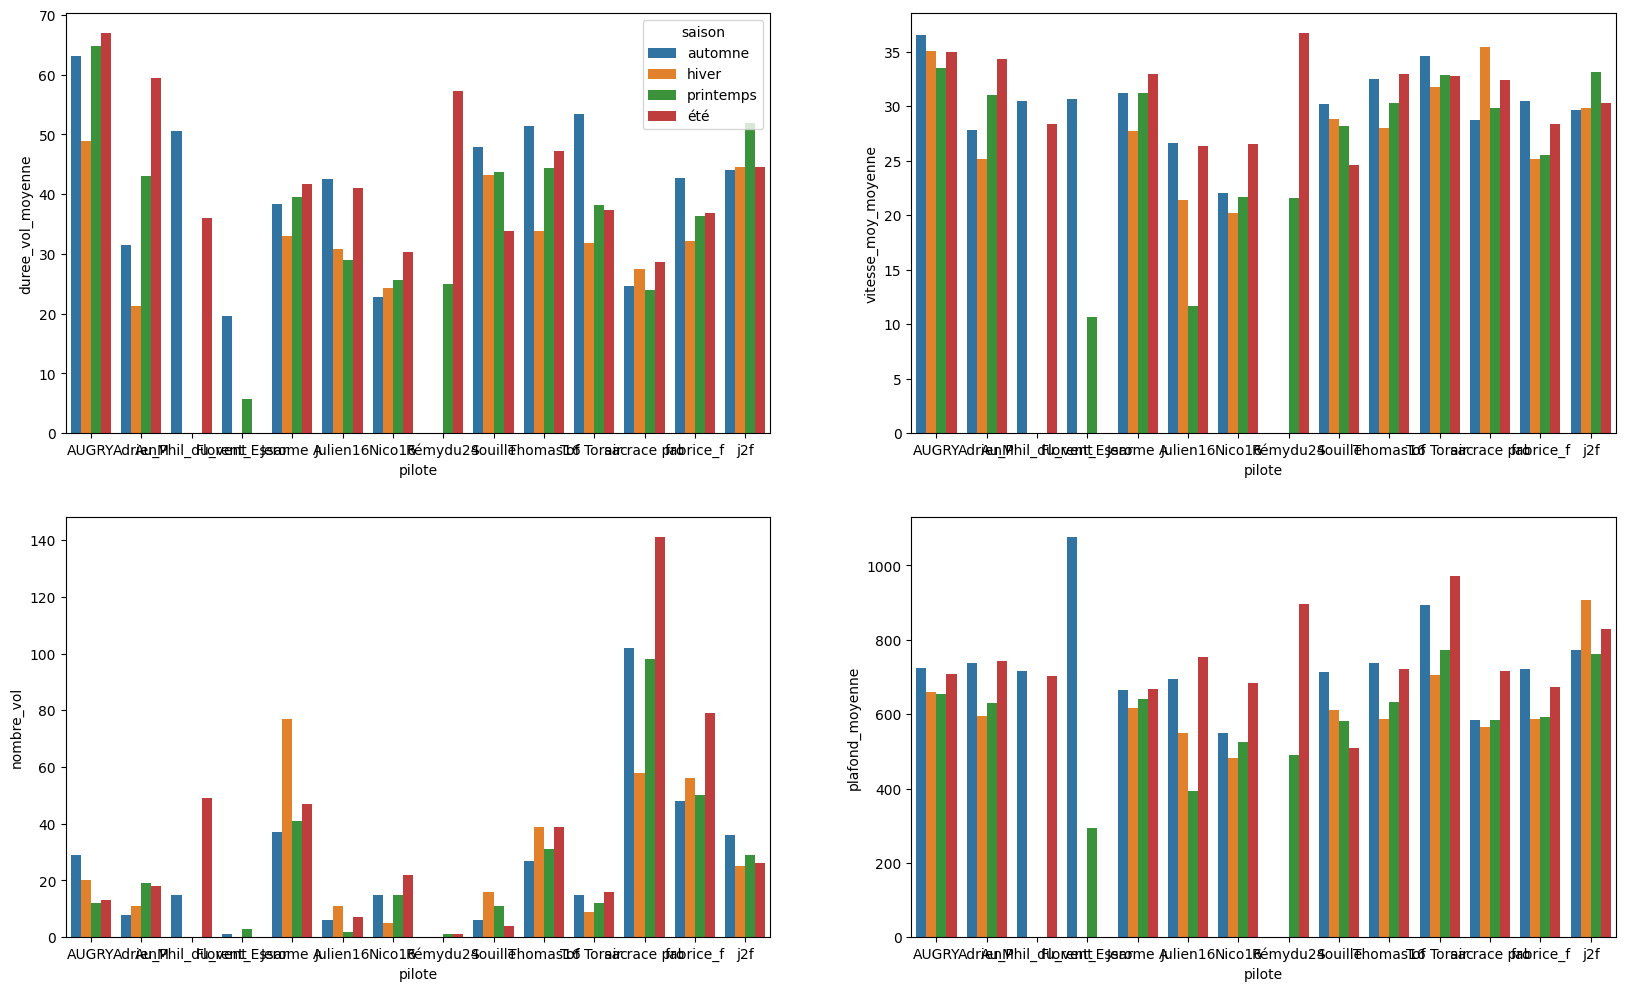

In [12]:
fig, axes = plt.subplots(2,2, figsize =(20,12))
ax0, ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
sns.barplot(data=df_saison_moy_tot_paramot, x="pilote", y="duree_vol_moyenne", hue="saison", ax=ax0);
sns.barplot(data=df_saison_moy_tot_paramot, x="pilote", y="vitesse_moy_moyenne", hue="saison", ax=ax1);
sns.barplot(data=df_saison_moy_tot_paramot, x="pilote", y="nombre_vol", hue="saison", ax=ax2);
sns.barplot(data=df_saison_moy_tot_paramot, x="pilote", y="plafond_moyenne", hue="saison", ax=ax3);

ax1.legend_.remove();
ax2.legend_.remove();
ax3.legend_.remove();

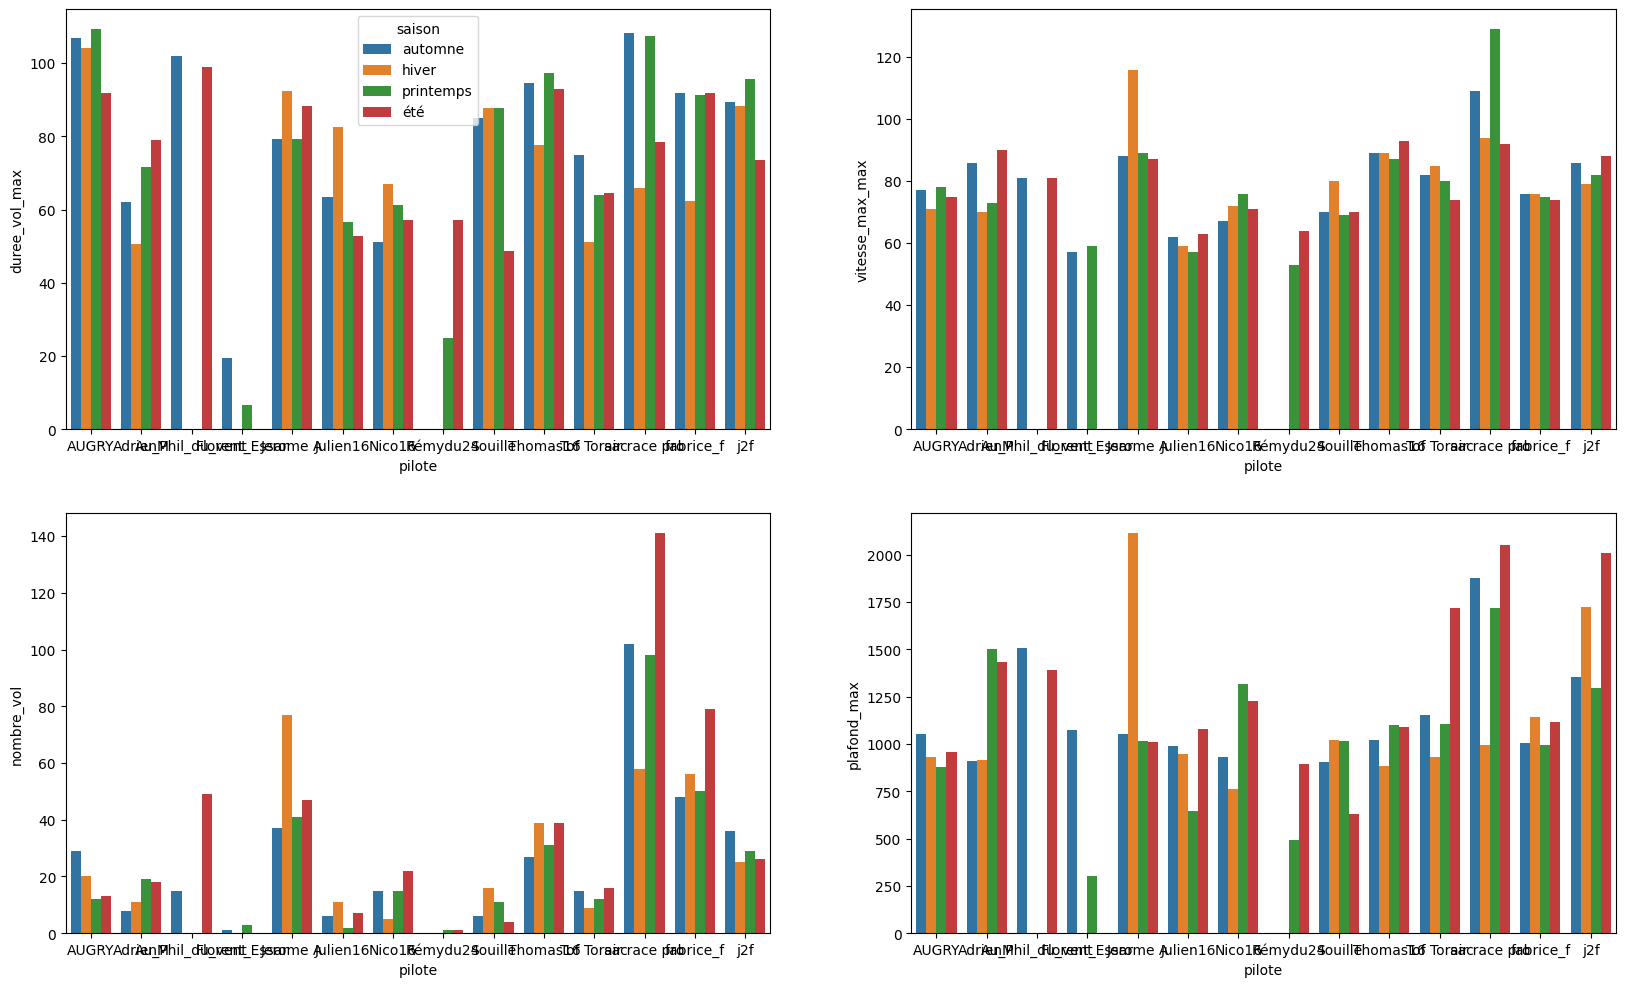

In [13]:
fig, axes = plt.subplots(2,2, figsize =(20,12))
ax0, ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
sns.barplot(data=df_saison_max_tot_paramot, x="pilote", y="duree_vol_max", hue="saison", ax=ax0);
sns.barplot(data=df_saison_max_tot_paramot, x="pilote", y="vitesse_max_max", hue="saison", ax=ax1);
sns.barplot(data=df_saison_max_tot_paramot, x="pilote", y="nombre_vol", hue="saison", ax=ax2);
sns.barplot(data=df_saison_max_tot_paramot, x="pilote", y="plafond_max", hue="saison", ax=ax3);

ax1.legend_.remove();
ax2.legend_.remove();
ax3.legend_.remove();

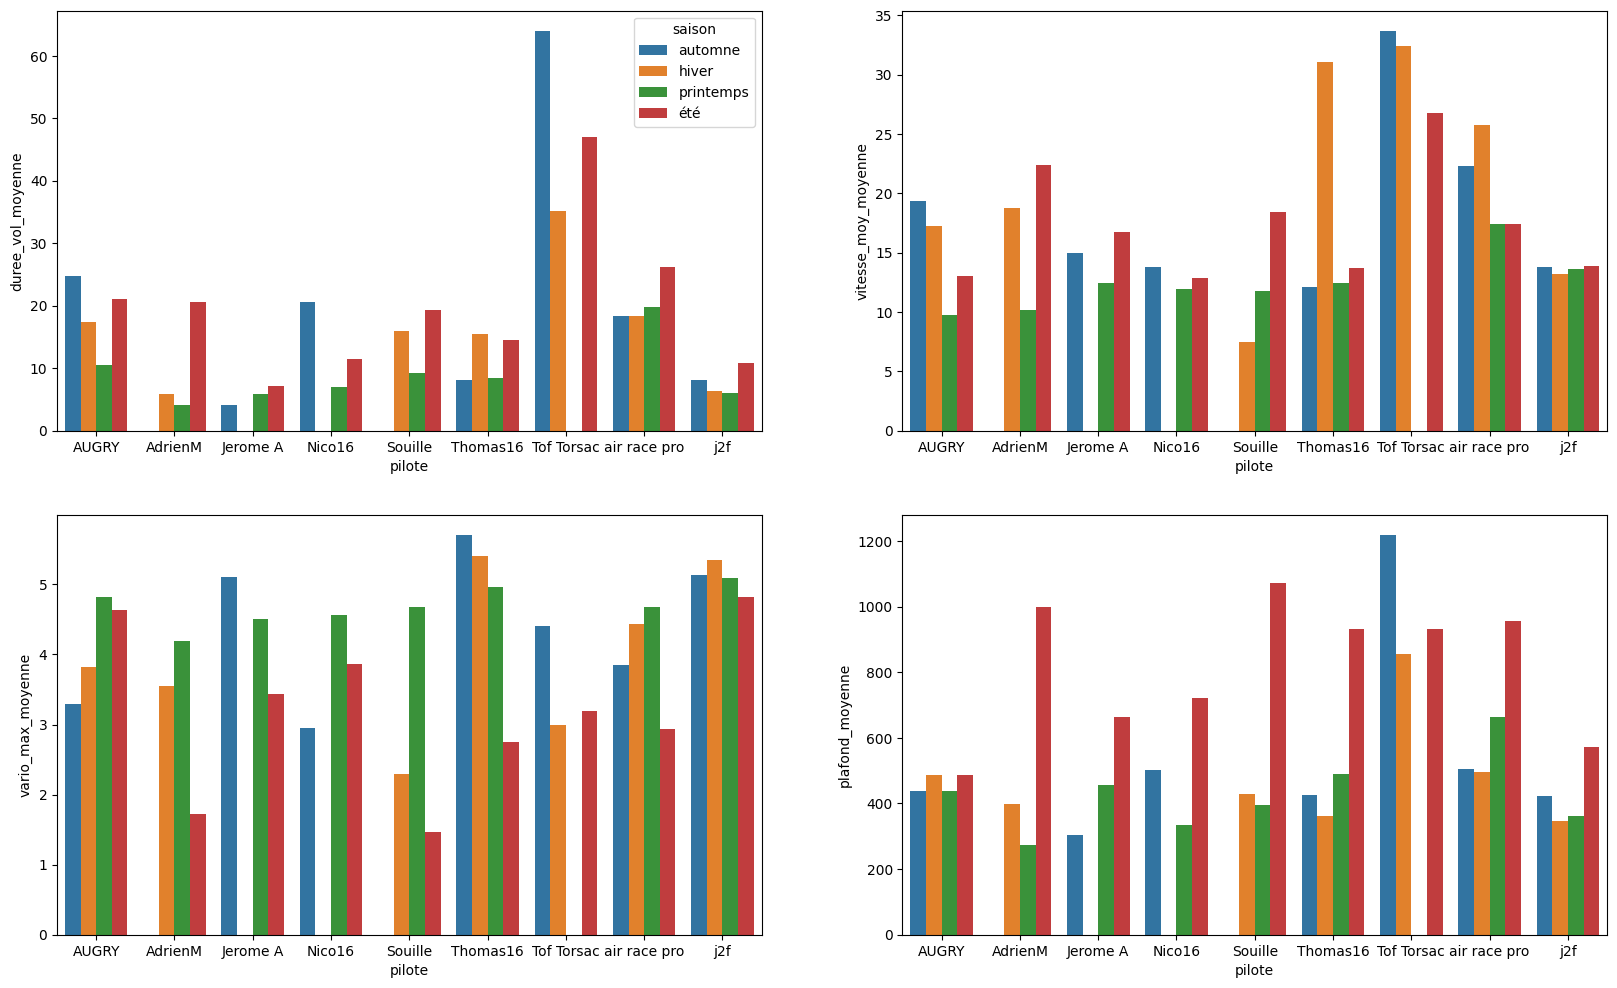

In [10]:
fig, axes = plt.subplots(2,2, figsize =(20,12))
ax0, ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
sns.barplot(data=df_saison_moy_tot_parap, x="pilote", y="duree_vol_moyenne", hue="saison", ax=ax0);
sns.barplot(data=df_saison_moy_tot_parap, x="pilote", y="vitesse_moy_moyenne", hue="saison", ax=ax1);
sns.barplot(data=df_saison_moy_tot_parap, x="pilote", y="vario_max_moyenne", hue="saison", ax=ax2);
sns.barplot(data=df_saison_moy_tot_parap, x="pilote", y="plafond_moyenne", hue="saison", ax=ax3);

ax1.legend_.remove();
ax2.legend_.remove();
ax3.legend_.remove();

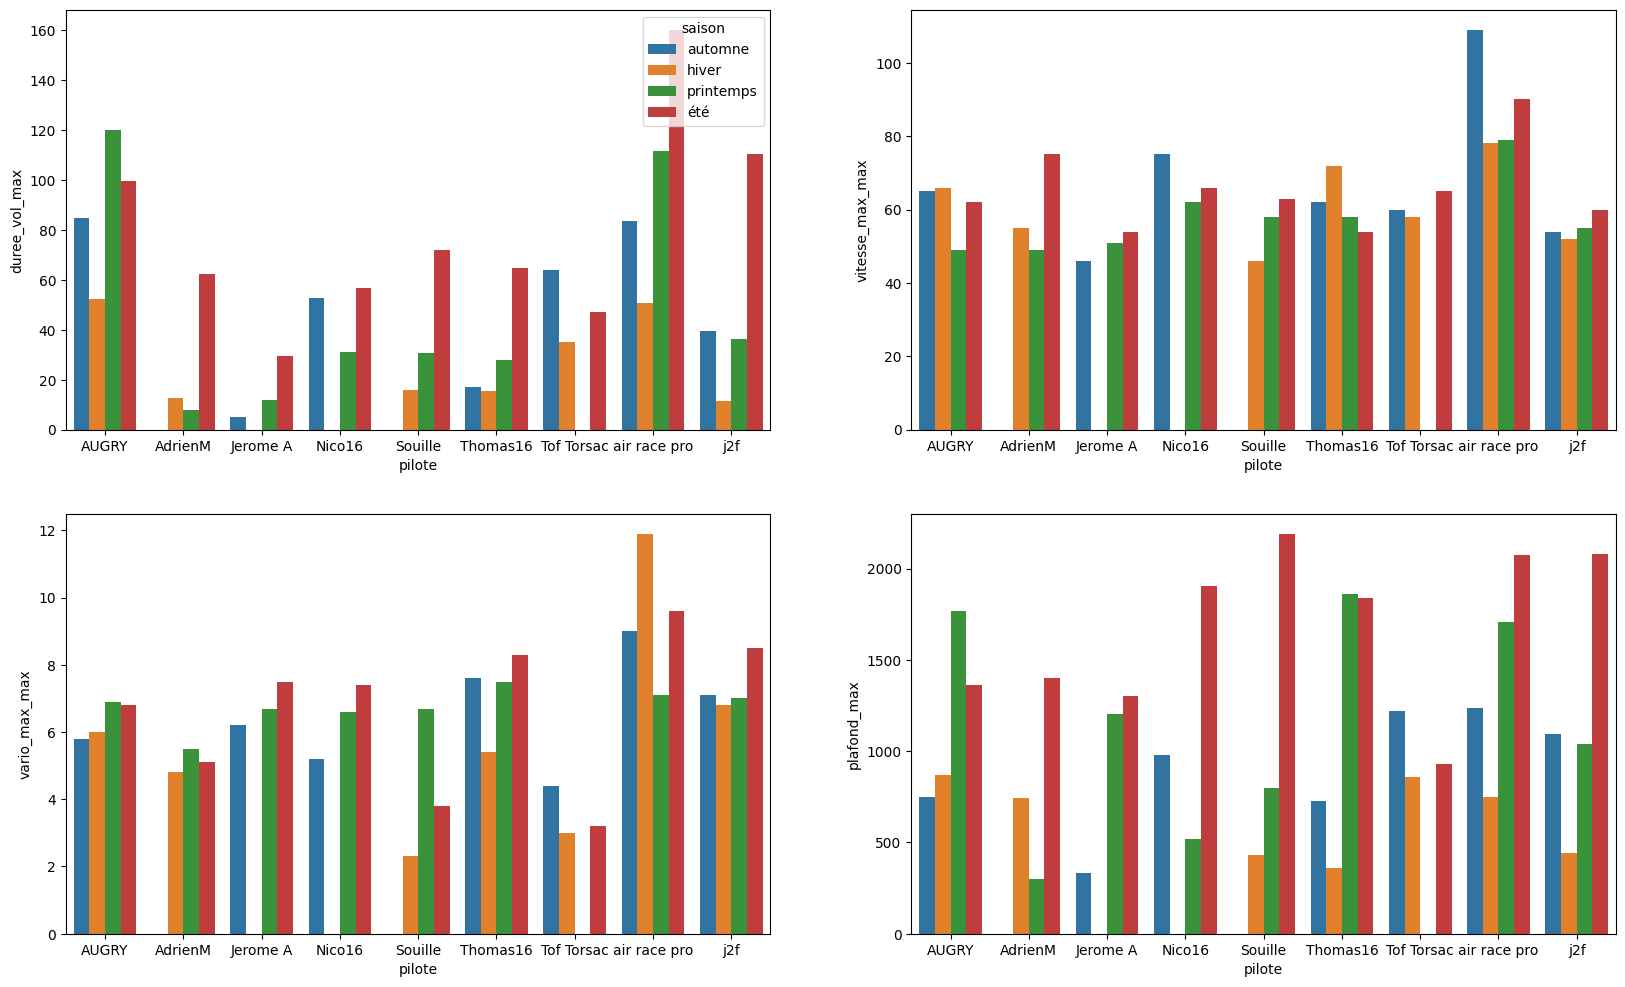

In [11]:
fig, axes = plt.subplots(2,2, figsize =(20,12))
ax0, ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
sns.barplot(data=df_saison_max_tot_parap, x="pilote", y="duree_vol_max", hue="saison", ax=ax0);
sns.barplot(data=df_saison_max_tot_parap, x="pilote", y="vitesse_max_max", hue="saison", ax=ax1);
sns.barplot(data=df_saison_max_tot_parap, x="pilote", y="vario_max_max", hue="saison", ax=ax2);
sns.barplot(data=df_saison_max_tot_parap, x="pilote", y="plafond_max", hue="saison", ax=ax3);

ax1.legend_.remove();
ax2.legend_.remove();
ax3.legend_.remove();

In [12]:
df_wing_glob = df_tot.groupby(["voile"], as_index=False).agg(nb_vols=("voile", "count"),
                                    moyenne_vitesse_moy=("vitesse_moyenne", "mean"),
                                    moyenne_vitesse_max=("vitesse_max", "mean"),
                                    max_vitesse_max=("vitesse_max", "max"),
                                    moyenne_duree_vol=("duree_vol_minutes", "mean"),
                                    total_duree_vol_minutes=("duree_vol_minutes", "sum")).sort_values(by="moyenne_vitesse_moy")
df_wing_glob["total_vol_heures"] = round(df_wing_glob["total_duree_vol_minutes"]/60, 0)
df_wing_glob

,voile,nb_vols,moyenne_vitesse_moy,moyenne_vitesse_max,max_vitesse_max,moyenne_duree_vol,total_duree_vol_minutes,total_vol_heures
15,Leaf 2 Light,93,12.924731,42.956989,55,12.710394,1182.066667,20.0
13,LEAF 2,94,13.479787,44.244681,66,13.472163,1266.383333,21.0
9,Dolpo,9,15.233333,43.666667,52,5.007407,45.066667,1.0
20,taska,60,15.715000,48.283333,86,28.192778,1691.566667,28.0
6,Bulldog BI 16WL,1,18.600000,50.000000,50,19.383333,19.383333,0.0
19,savage,160,18.864375,52.031250,109,23.264271,3722.283333,62.0
2,BOXER GT,75,18.872000,47.000000,71,33.126667,2484.500000,41.0
14,LEAF 2 LIGHT,15,19.133333,38.400000,51,8.653333,129.800000,2.0
0,BILLY,74,20.125676,50.283784,76,20.033108,1482.450000,25.0
16,Non renseig,403,21.118610,52.446650,88,23.709140,9554.783333,159.0


In [13]:
df_tot_paramot.head()
df_pilote_glob = (
    df_tot.groupby(["pilote"], as_index=False)
        .agg(
            nb_vols=("voile", "count"),
            moyenne_vitesse_moy=("vitesse_moyenne", "mean"),
            moyenne_vitesse_max=("vitesse_max", "mean"),
            max_vitesse_max=("vitesse_max", "max"),
            moyenne_duree_vol=("duree_vol_minutes", "mean"),
            total_duree_vol_minutes=("duree_vol_minutes", "sum"),
            nb_sites=("site", "nunique"),
            )
        .sort_values(by="moyenne_vitesse_moy")
    )
df_pilote_glob["total_vol_heures"] = round(df_pilote_glob["total_duree_vol_minutes"]/60, 0)
df_pilote_glob

,pilote,nb_vols,moyenne_vitesse_moy,moyenne_vitesse_max,max_vitesse_max,moyenne_duree_vol,total_duree_vol_minutes,nb_sites,total_vol_heures
3,Nico16,168,16.407143,46.904762,76,16.362103,2748.833333,16,46.0
8,j2f,348,19.235345,50.709770,88,20.880220,7266.316667,18,121.0
5,Thomas16,234,23.182906,56.264957,93,29.729345,6956.666667,20,116.0
4,Souille,52,23.875000,53.326923,80,34.046795,1770.433333,9,30.0
0,AUGRY,134,25.110448,52.485075,78,40.579975,5437.716667,11,91.0
7,air race pro,651,26.276344,60.248848,129,25.037378,16299.333333,21,272.0
2,Jerome A,268,26.658209,57.694030,116,29.712376,7962.916667,13,133.0
1,AdrienM,72,27.040278,59.416667,90,34.559954,2488.316667,10,41.0
6,Tof Torsac,55,33.034545,63.436364,85,41.608485,2288.466667,6,38.0


In [14]:
df_tot_paramot.head()

,pilote,num_activite,types,site,date,heure,flight_time,voile,distance,instrument,date_activite,site_activite,distance_activite,distance_cumulee,vitesse_max,vitesse_moyenne,plafond,gain,duree_vol,vario_max,g_max,adresse_zip,duree_vol_minutes,type_vol,annee,mois,jour_semaine,saison
0,AdrienM,1979467,Vol moteur,Site Secondigne Sur Belle 01,2023-02-16,12:49:00,0 days 00:26:14,Daytona,11,Evolution,2023-02-16,Site Secondigne Sur Belle 01,11,16,70,25.2,479,419,0 days 00:26:14,3.4,1.5,https://www.syride.com/scripts/downloadZIP.php...,26.233333,paramoteur,2023,2,Thursday,hiver
1,AdrienM,2079412,Vol moteur,Fayard,2023-05-13,09:19:00,0 days 00:52:36,Daytona,27,Evolution,2023-05-13,Fayard,27,34,61,30.8,751,615,0 days 00:52:36,2.9,1.6,https://www.syride.com/scripts/downloadZIP.php...,52.600000,paramoteur,2023,5,Saturday,printemps
2,AdrienM,2035366,Vol moteur,Magnac Lavalette Treuil,2023-04-09,19:13:00,0 days 00:49:02,Flex-one,28,Evolution,2023-04-09,Magnac Lavalette Treuil,28,33,62,34.3,792,667,0 days 00:49:02,2.8,1.5,https://www.syride.com/scripts/downloadZIP.php...,49.033333,paramoteur,2023,4,Sunday,printemps
4,AdrienM,2190658,Vol moteur,Site Secondigne Sur Belle 01,2023-07-22,09:08:00,0 days 00:39:38,Daytona,22,Evolution,2023-07-22,Site Secondigne Sur Belle 01,22,24,67,33.3,542,497,0 days 00:39:38,3.1,1.2,https://www.syride.com/scripts/downloadZIP.php...,39.633333,paramoteur,2023,7,Saturday,été
5,AdrienM,2252108,Vol moteur,Site Secondigne Sur Belle 01,2023-08-23,19:20:00,0 days 01:02:48,Daytona,35,Evolution,2023-08-23,Site Secondigne Sur Belle 01,35,46,61,33.4,881,827,0 days 01:02:48,4.4,1.4,https://www.syride.com/scripts/downloadZIP.php...,62.800000,paramoteur,2023,8,Wednesday,été
